In [6]:
import numpy as np
import random

## Locality Sensitivity Hashing

![LSH Flow](flow.png)

In [15]:
with open('bruno-mars.txt', 'r') as file:
    lines = [line.strip() for line in file.readlines() if line.strip()]
print(f"First Line in that document is '{lines[0]}'")
print(f"That document have {len(lines)} lines")
lines = lines[:500]

First Line in that document is 'Now greetings to the world! Standing at this liquor store,'
That document have 3154 lines


![LSH shingles](shingles.png)

In [16]:
def shingle(text,k=5):
    shingleSet = []
    for i in range(len(text)-k+1):
        shingleSet.append(text[i:i+k])
    return set(shingleSet)

In [18]:
vocabulary = set()
for line in lines:
    singleLineShingles = shingle(line)
    vocabulary = vocabulary.union(singleLineShingles)
vocabulary = list(vocabulary)
print(f"one element in vocabulary is '{vocabulary[0]}'")
print(f"That vocabulary have {len(vocabulary)} word/element")
print("all ",vocabulary)

one element in vocabulary is 'For w'
That vocabulary have 6121 word/element
all  ['For w', ' etiq', 'the h', 'ot Ch', 'n but', "'m bo", "' it ", 'm too', " let'", 'rythi', ', bad', 'rling', 'en fl', 'ué va', 'ite g', ' fron', ' sexy', 'Ho Ho', 'ack t', ' grea', 'etter', 'Lucky', 'ld ha', 'edo e', 'p you', 'e ton', ' a th', 'be re', 'ía ve', 'o Ric', ', Mis', ' we s', 'wberr', "e '68", '-pop ', 'karat', 'ore b', 'wenty', 'agon ', 'I bet', 'ssed ', 'do qu', 'or st', ' sad ', 'e a b', ' she ', 'feet ', 'y hea', ' Give', 's out', 'cesit', 'ire s', 'it it', 'she a', 'ng if', ' ser,', 'drago', 'about', 'chica', 'Mad w', 'the a', 'a liv', 'he Ca', 'ok in', "'d ca", 'ys he', 'e the', 'ro es', 'ayer,', 'se up', 'hem a', "'ve b", 'tá ma', 'nera,', ' cond', 'Go po', 'of me', 'I had', 'llet ', ' if i', 'r the', 'ng I ', " 'bou", 's Sat', 'hy yo', "'d ne", 'ching', 'ntas ', ' ¿Est', 'ch ho', 'ht ri', 'ty li', 'eak i', 'p, wa', 'aying', 'a few', 'e for', 'Puert', "ar I'", 'sage ', 'again', 'loose', 

![LSH OneHotEncoding](onehot.png)


In [19]:
oneHotEncodingDictionary = {}
for idx,line in enumerate(lines):
    oneHotEncodingDictionary[idx] = [ 1 if x in shingle(line) else 0 for x in vocabulary]     

In [20]:
sum(oneHotEncodingDictionary[0])

54

In [23]:

("oneHotEncodingDictionary",oneHotEncodingDictionary)

('oneHotEncodingDictionary',
 {0: [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
  

In [21]:
len(shingle(lines[0]))

54


![LSH signature](signature.png)


In [24]:
hashIdx = list(range(1,len(vocabulary)+1))
print(hashIdx[:10])
random.shuffle(hashIdx)
print(hashIdx[:10])
print(f"value => Idx")
for i in range(1,5):
    print(f"{i} => {hashIdx.index(i)}")

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1840, 6121, 2746, 2977, 415, 4757, 2814, 5256, 6035, 4733]
value => Idx
1 => 3188
2 => 1384
3 => 222
4 => 2488


In [25]:
def createHashFunction(vocabSize):
    hashIdxs = list(range(1,vocabSize+1))
    random.shuffle(hashIdxs)
    return hashIdxs

In [26]:
def buildMinhashFunction(vocabSize , n):
    hashes = []
    for i in range(n):
        hashes.append(createHashFunction(vocabSize))
    return hashes

In [27]:
minhashVector = buildMinhashFunction(len(vocabulary),20)

In [28]:
def createHash(oneHotCode,minhashVector,vocabSize):
    signature = []
    for func in minhashVector:
        for i in range(1,vocabSize+1):
            idx = func.index(i)
            signatureValue = oneHotCode[idx]
            if signatureValue == 1:
                signature.append(idx)
                break
    return signature

In [29]:
signatureEncodingDictionary = {}
for key in oneHotEncodingDictionary.keys():
    signatureEncodingDictionary[key] = createHash(oneHotEncodingDictionary[key],minhashVector,len(vocabulary))

In [30]:
signatureEncodingDictionary[4]

[4148,
 1549,
 1714,
 4148,
 1137,
 5367,
 2934,
 1137,
 169,
 3492,
 4541,
 84,
 5367,
 5941,
 84,
 3778,
 3778,
 1243,
 6076,
 1437]

![LSH Compare](compare.png)

In [31]:
def jaccardSimilarity(x,y):
    return len(x.intersection(y)) / len(x.union(y))

In [32]:
# get Jaccard similarity between 2 lines from data
x = set(signatureEncodingDictionary[12])
y = set(signatureEncodingDictionary[13])
jSimilarity = jaccardSimilarity(x,y)
print(f"Similarity Between '{lines[12]}' & '{lines[13]}' = {jSimilarity}")

Similarity Between 'One shot for my pain,' & 'One drag for my sorrow.' = 0.038461538461538464


In [33]:
def splitVector(signature , nBands):
    assert len(signature)%nBands == 0
    r = len(signature)// nBands
    subVectors = []
    for i in range(0,len(signature),r):
        subVectors.append(signature[i:i+r])
    return subVectors

In [22]:
nBands = 10
xBands = splitVector(signatureEncodingDictionary[12] , nBands)
yBands = splitVector(signatureEncodingDictionary[13] , nBands)

In [23]:
yBands

[[426, 1889],
 [426, 5011],
 [3646, 5483],
 [5480, 1889],
 [403, 5480],
 [426, 1378],
 [2349, 5011],
 [1500, 738],
 [403, 5483],
 [2641, 738]]

In [24]:
for x_b , y_b in zip(xBands,yBands):
    if x_b == y_b :
        print(f"Candidate Pairs are {x_b} & {y_b}")

Candidate Pairs are [2349, 5011] & [2349, 5011]


## Lab Task

### Apply LSH algorithm on these 2 phrases using k = 2 ,n = 10, nBand = 5

In [1]:
phrase1 = ["One drag for my sorrow","Get messed up today","I'll be ok tomorrow"]
phrase2 = ["Cause my job got me going nowhere","Take me to a place where I don't care"]
all_phrases = phrase1 + phrase2

In [2]:
import numpy as np
def build_shingles(sentence: str, k: int):
    shingles = []
    for i in range(len(sentence) - k):
        shingles.append(sentence[i:i+k])
    return set(shingles)

def build_vocab(shingle_sets: list):
    # convert list of shingle sets into single set
    full_set = {item for set_ in shingle_sets for item in set_}
    vocab = {}
    for i, shingle in enumerate(list(full_set)):
        vocab[shingle] = i
    return vocab

def one_hot(shingles: set, vocab: dict):
    vec = np.zeros(len(vocab))
    for shingle in shingles:
        idx = vocab[shingle]
        vec[idx] = 1
    return vec

In [3]:
k = 2  # shingle size

# build shingles
shingles = []
for sentence in all_phrases:
    shingles.append(build_shingles(sentence, k))
print("shingles",shingles)

# build vocab
vocab = build_vocab(shingles)
print("vocab",vocab)
# one-hot encode our shingles
shingles_1hot = []
for shingle_set in shingles:
    shingles_1hot.append(one_hot(shingle_set, vocab))
# stack into single numpy array
print("shingles_1hot",shingles_1hot)
shingles_1hot = np.stack(shingles_1hot)
shingles_1hot.shape

shingles [{'r ', 'On', ' f', 'ro', ' d', ' m', 'ne', 'g ', ' s', 'or', 'rr', 'dr', 'so', 'e ', 'my', 'ag', 'fo', 'ra', 'y '}, {'t ', 'to', 'et', ' t', 'da', 'me', 'se', 'p ', 'ed', 'up', 'Ge', 'd ', ' m', 'ss', 'od', ' u', 'es'}, {'ok', 'to', 'l ', 'ro', ' o', ' t', 'or', 'rr', 'k ', "I'", ' b', 'be', 'll', "'l", 'e ', 'mo', 'om'}, {'he', 'oi', 'jo', 't ', 'b ', 'in', ' n', ' m', 'no', 'g ', 'us', 'ob', 'Ca', 'ow', 'er', 'e ', 'my', ' g', 'go', ' j', 'me', 'se', 'y ', 'wh', 'ng', 'au', 'ot'}, {'to', 'I ', ' p', 'on', ' t', 'he', ' c', 'do', 'o ', "'t", ' w', 't ', 'Ta', ' I', 're', ' d', ' m', 'ak', 'a ', 'ce', 'er', 'ac', 'ke', 'e ', ' a', 'ar', 'ca', 'me', 'pl', 'wh', "n'", 'la'}]
vocab {'l ': 0, ' t': 1, 'od': 2, 'b ': 3, ' b': 4, ' d': 5, 'ak': 6, 'no': 7, 'us': 8, 'or': 9, 'rr': 10, 'ow': 11, 'ok': 12, ' j': 13, 'to': 14, ' c': 15, 'do': 16, 'o ': 17, 'up': 18, "'t": 19, ' w': 20, 'Ta': 21, 'be': 22, 'in': 23, ' n': 24, ' m': 25, 'ed': 26, 'ss': 27, 'da': 28, ' o': 29, 'er': 30, '

(5, 87)

In [71]:
shingles_1hot[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.

In [4]:
sum(shingles_1hot[0])  # confirm we have 1s

19.0

In [6]:
def minhash_arr(vocab: dict, resolution: int):
    length = len(vocab.keys())
    arr = np.zeros((resolution, length))
    for i in range(resolution):
        permutation = np.random.permutation(len(vocab)) + 1
        arr[i, :] = permutation.copy()
    return arr.astype(int)

def get_signature(minhash, vector):
    # get index locations of every 1 value in vector
    idx = np.nonzero(vector)[0].tolist()
    # use index locations to pull only +ve positions in minhash
    shingles = minhash[:, idx]
    # find minimum value in each hash vector
    signature = np.min(shingles, axis=1)
    return signature

In [13]:
arr = minhash_arr(vocab, 5)
print("arr",arr)
signatures = []

for vector in shingles_1hot:
    signatures.append(get_signature(arr, vector))
print("signatures",signatures)
# merge signatures into single array
signatures = np.stack(signatures)
signatures.shape

arr [[51 78 39  4 17 20 31 65 11 42 69 35 66 62 19 85 77 36 82  9 24 48 28 73
  34 80 64 71 12 72 30 86 53  3 52 54 15 10 49  5 14 45 41 84 21 87 83 25
  57 68 60 79 22 59 40  2 44 56 33 23 29  6 32 46 55 43  8 74 67 16 50 47
  27 76 18 61 75 37 58  1 63 81 70 26 38  7 13]
 [56 59 19 70 52 28 81 72 35 63 18 85 49 24 15 34 84 75  5 42 82 43 12  1
  47  3 22 60 67 25 23 87  8 62 37 27 29 53 78  7 80 30 83 44 76 51 40 32
  77 74 39 17 66 58 61 26 33 38 11 10  6 20  2 54 65 48 41  9 14 13 21 79
  69 36 71 50 16 31 68 45 64 55 86 46 57  4 73]
 [59 52  7 28 17 75 62 73 27  9 58 60 23 29 61 79 22 72 66 69 15 84 68 39
  47  5  6 57 65 44 21 46  1 80 71 43 19 40 24 10 81 76 51 54 77 18 38 14
   2  4 56 11 13 12 50 64 26 53 67 33 34 20 87  8 85 48 55 36  3 82 16 86
  42 63 70 32 31 78 25 45 35 37 49 41 30 83 74]
 [58 55 33 11 87 40 81 60  5 24 31 50 53 82 46 73 75 63 26 83 41  8 14 72
  37 36 86 17 79 70 28 32 35 57 10 30 43 38 59 45 42 49 78 20 85  9 21 47
  61 25 56 67 16 23 22 13 39 48  2 80 

(5, 5)

In [14]:
from itertools import combinations

class LSH:
    buckets = []
    counter = 0
    def __init__(self, b):
        self.b = b
        for i in range(b):
            self.buckets.append({})

    def make_subvecs(self, signature):
        l = len(signature)
        assert l % self.b == 0
        r = int(l / self.b)
        # break signature into subvectors
        subvecs = []
        for i in range(0, l, r):
            subvecs.append(signature[i:i+r])
        return np.stack(subvecs)
    
    def add_hash(self, signature):
        subvecs = self.make_subvecs(signature).astype(str)
        for i, subvec in enumerate(subvecs):
            subvec = ','.join(subvec)
            if subvec not in self.buckets[i].keys():
                self.buckets[i][subvec] = []
            self.buckets[i][subvec].append(self.counter)
        self.counter += 1

    def check_candidates(self):
        candidates = []
        for bucket_band in self.buckets:
            keys = bucket_band.keys()
            for bucket in keys:
                hits = bucket_band[bucket]
                if len(hits) > 1:
                    candidates.extend(combinations(hits, 2))
        return set(candidates)

In [19]:
b = 5

lsh = LSH(b)

for signature in signatures:
    lsh.add_hash(signature)

In [20]:
lsh.buckets

[{'3': [0, 0, 0],
  '2': [1, 1, 1],
  '6': [2, 2, 2],
  '4': [3, 3, 3],
  '1': [4, 4, 4]},
 {'3': [0, 1, 0, 1, 0, 1], '10': [2, 2, 2], '1': [3, 3, 3], '2': [4, 4, 4]},
 {'4': [0, 0, 0],
  '3': [1, 1, 1],
  '9': [2, 2, 2],
  '2': [3, 3, 3],
  '1': [4, 4, 4]},
 {'4': [0, 2, 0, 2, 0, 2], '10': [1, 1, 1], '1': [3, 3, 3], '2': [4, 4, 4]},
 {'1': [0, 3, 0, 3, 0, 3], '19': [1, 1, 1], '10': [2, 2, 2], '6': [4, 4, 4]},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {}]

In [21]:
candidate_pairs = lsh.check_candidates()
print("candidate_pairs",candidate_pairs)
len(candidate_pairs)

candidate_pairs {(4, 4), (0, 1), (0, 0), (1, 1), (0, 3), (2, 0), (3, 0), (0, 2), (3, 3), (2, 2), (1, 0)}


11

In [90]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
def jaccard(a: set, b: set):
    return len(a.intersection(b)) / len(a.union(b))
pairs = pd.DataFrame({
    'x': [],
    'y': [],
    'jaccard': [],
    'cosine': [],
    'candidate': []
})

data_len = shingles_1hot.shape[0]
chosen = set()
# take random sample of pairs
sample_size = 50_000
for _ in range(sample_size):
    x, y = np.random.choice(data_len, 2)
    if x == y or (x, y) in chosen: continue
    chosen.add((x, y))
    vector_x = signatures[x]
    vector_y = signatures[y]
    candidate = 1 if (x, y) in candidate_pairs else 0
    cosine = cosine_similarity([vector_x], [vector_y])[0][0]
    pairs = pairs.append({
            'x': x,
            'y': y,
            'jaccard': jaccard(set(vector_x), set(vector_y)),
            'cosine': cosine,
            'candidate': candidate
        }, ignore_index=True)

# add a normalized cosine column for better alignment
cos_min = pairs['cosine'].min()
cos_max = pairs['cosine'].max()
pairs['cosine_norm'] = (pairs['cosine'] - cos_min) / (cos_max - cos_min)

/tmp/ipykernel_17243/1606129657.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pairs = pairs.append({
/tmp/ipykernel_17243/1606129657.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pairs = pairs.append({
/tmp/ipykernel_17243/1606129657.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pairs = pairs.append({
/tmp/ipykernel_17243/1606129657.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pairs = pairs.append({
/tmp/ipykernel_17243/1606129657.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pairs = pairs.append({
/tmp/ipykernel_

<Axes: xlabel='cosine', ylabel='candidate'>

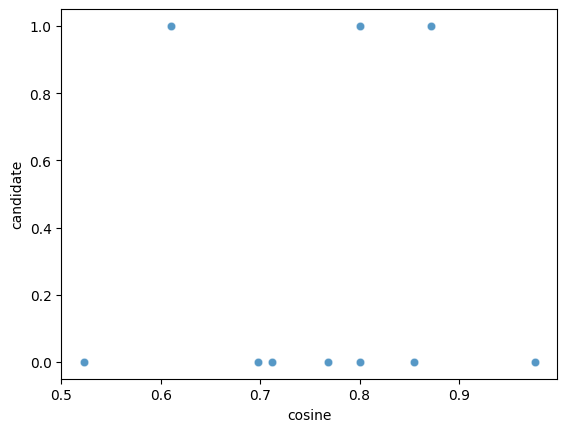

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=pairs, x='cosine', y='candidate', alpha=0.5)